# 1. Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk


# 2. Download & Import Stopwords (One-Time Step)

In [2]:
nltk.download('stopwords')
from nltk.corpus import stopwords

#This line downloads the list of stopwords (like "the", "is", "and") used in many languages.
#hese words are often removed during text preprocessing because they don't carry strong meaning for classification.

[nltk_data] Downloading package stopwords to /home/eman-
[nltk_data]     aslam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 3. Load the IMDB Dataset and Check Column Names

In [3]:
df=pd.read_csv('IMDB Dataset.csv')
df
print(df.columns)

Index(['review', 'sentiment'], dtype='object')


# 4. Remove Missing (NaN) Values

In [4]:
df.dropna(inplace=True)

# 5. Function to Clean Each Review

In [5]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str



# 6.Apply Cleaning Function to the Entire Dataset

In [6]:
from tqdm import tqdm
tqdm.pandas()
df['review'] = df['review'].progress_apply(clean_review)


100%|█████████████████████████████████████| 50000/50000 [30:35<00:00, 27.25it/s]


# 7. Importing WordCloud for Visualization

In [10]:
from wordcloud import WordCloud

# 8. Creating a Word Cloud for Negative Sentiment Reviews



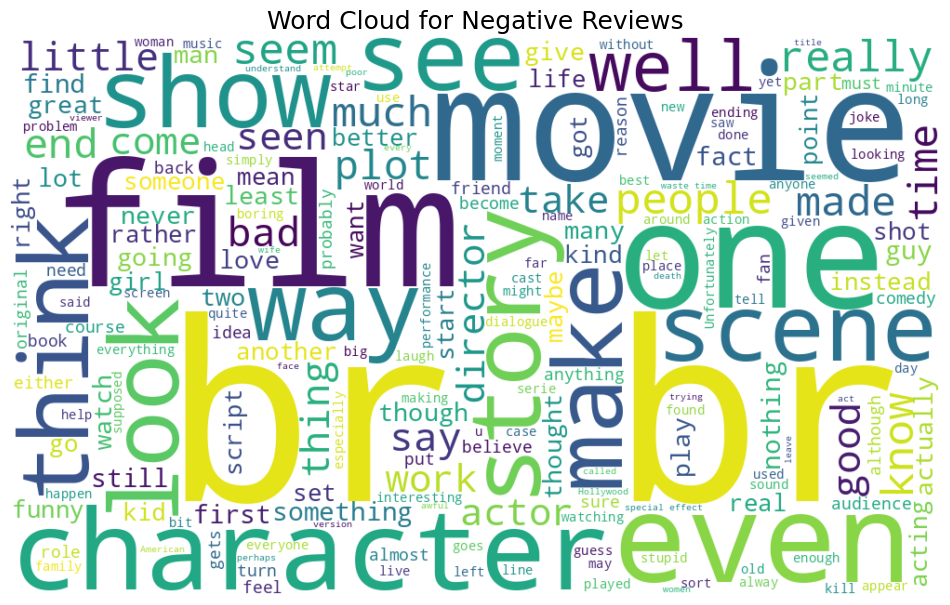

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter negative reviews
neg_reviews = df['review'][df['sentiment'] == 'negative'].astype(str)

# Check if any negative reviews exist
if neg_reviews.empty:
    print("No negative reviews found. Cannot generate word cloud.")
else:
    # Join all the negative review texts
    text = ' '.join(neg_reviews)

    # Generate the word cloud
    wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud for Negative Reviews", fontsize=18)
    plt.show()


# 9. Creating a Word Cloud for Positive Sentiment Reviews

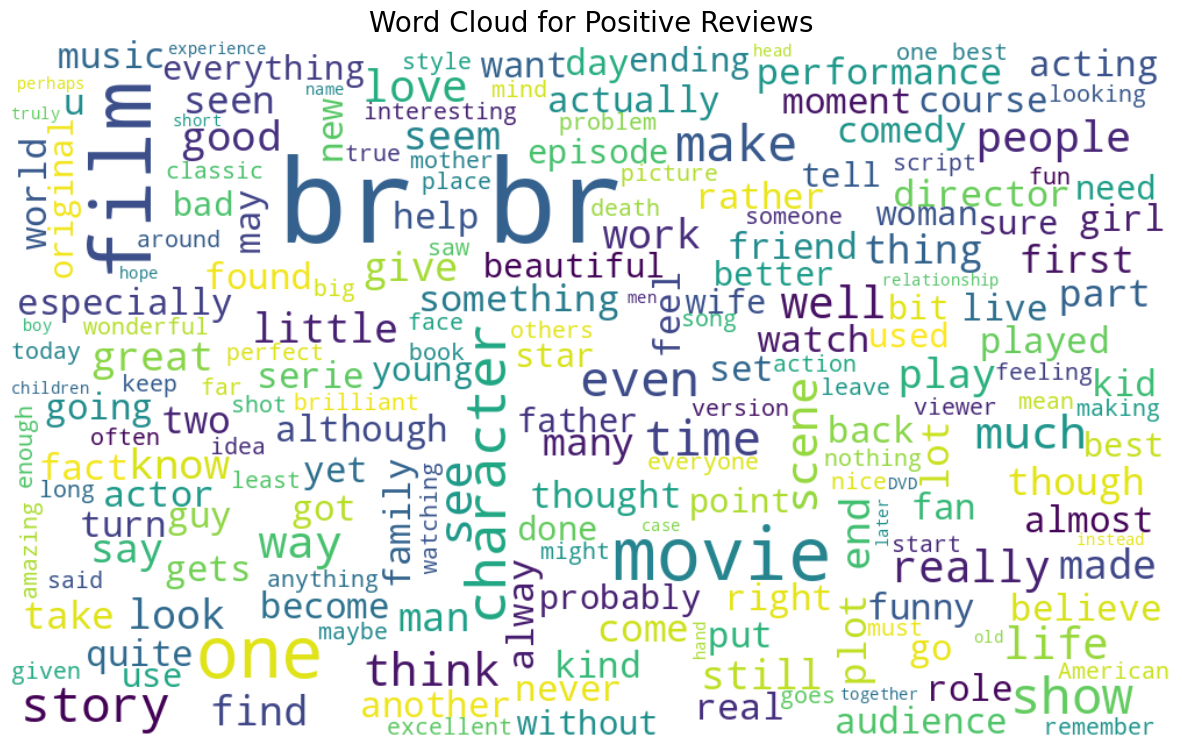

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter and combine all positive reviews into one string
positive_reviews = ' '.join(df['review'][df['sentiment'] == 'positive'].astype(str))

# Create the WordCloud object
wordcloud = WordCloud(width=1000, height=600, background_color='white', max_font_size=100)

# Plot the WordCloud
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud.generate(positive_reviews), interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Reviews", fontsize=20)
plt.show()


# 10. Converting Text to Numeric Features Using TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

# 11. Transforming Text Reviews into Numerical Vectors

In [18]:
reviews = cv.fit_transform(df['review']).toarray()


# 12. Code Purpose: Convert Sentiment Labels from Text to Numeric



In [19]:
df['sentiment'] = df['sentiment'].replace(['pos', 'neg'], [1, 0])


# 13.Code Purpose: Check Sentiment Class Distribution



In [21]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

# 14. Import Logistic Regression Model & Train/Test Split & Model Training

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, df['sentiment'], test_size=0.2)

In [28]:
model.fit(reviews_train,sent_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
predict = model.predict(reviews_test)

# 15.Check Model Accuracy

In [31]:
from sklearn.metrics import accuracy_score


In [32]:
train_pred = model.predict(reviews_train)
train_accuracy = accuracy_score(sent_train, train_pred)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.902825


In [33]:
test_pred = model.predict(reviews_test)
test_accuracy = accuracy_score(sent_test, test_pred)
print("Testing Accuracy:", test_accuracy)


Testing Accuracy: 0.8804


# 16.Confusion Matrix Visualization

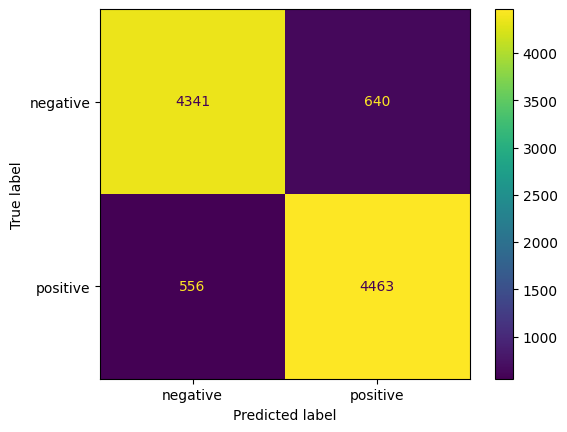

In [34]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

# 17.Saving  Model with Pickle

In [41]:
import pickle

# Load trained model and vectorizer
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)


# Example review to test

In [42]:

review = "The plot made no sense and the acting was terrible."

# Vectorize the review
review_vector = vectorizer.transform([review])

# Predict sentiment
prediction = model.predict(review_vector)

# Show result
if prediction[0] == 1:
    print("✅ Positive Review")
else:
    print("❌ Negative Review")


❌ Negative Review


In [36]:
pk.dump(model,open('model.pkl','wb'))

In [37]:
pk.dump(cv,open('scaler.pkl','wb'))